# <center> Neural Networks and Deep Learning (CSCI 5922)</center>
# <center> Spring 2020 </center>

**Name:** Timothy Mason

## Goal

The goal of this assignment is to introduce neural networks in terms of ideas you are already familiar with:  linear regression and classification

## Dataset

You are given a dataset with 2 input variables ($x_1$, $x_2$) and an output variable ($y$).

In [1]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
import numpy as np
import os

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

    # Load data from gDrive
    data = np.loadtxt(os.path.join('/content/drive/My Drive/spring2020/hw1-csci5922/data', 'assign1_data.txt'),  delimiter=',')
except:
    # Load data - relative path from notebook
    data = np.loadtxt(os.path.join('data', 'assign1_data.txt'),  delimiter=',')
    
X = data[:,:2]
y = data[:, 2]
z = data[:, 3]

Mounted at /content/drive


## Part 1

Write a program to find the exact least squares solution to $y = w_1 x_1 + w_2 x_2 + b$ for the above dataset, using the normal equation.

Complete the following function below and use it to answer questions (A) and (B). 

**Note:** Please do not change the interface of the given function.

In [0]:
def least_squares(X, y):
    """
    Finds the Least Squares solution
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of output value 'y' (size : no of examples X 1)
    
    Returns
    -------
    w : solution array
    """

    # From the text:  "Instead of adding the bias parameter b, one can continue to use 
    # the model with only weights but augment x with an extra entry that is always set 
    # to 1. The weight corresponding to the extra 1 entry plays the role of the bias 
    # parameter."

    X = np.c_[np.ones((X.shape[0],1)), X]   # Augment X's with extra 1's

    # Calculate the normal equation.
    w = np.linalg.inv(X.T @ X) @ X.T @ y

    return w

(A) Report the values of $w_1$, $w_2$, and $b$.

In [3]:
w = least_squares(X, y)
print(f"w_1 = {w[1]}\nw_2 = {w[2]}\n  b = {w[0]}")

w_1 = -2.0442425951376353
w_2 = 3.996860168659322
  b = -0.9242908118675891


(B) What function or method did you use to find the least-squares solution?

> The linear regression was calculated using the equation: 
> 
> $$\mathbf{w} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}$$
> 
> 
> The vector $\mathbf{w}$ provides the weight coefficients for the prediction $\hat{y}$:
> 
> $$ \hat{y} = \mathbf{w}^\top \mathbf{x} = w_1 x_1 + w_2 x_2 + \ldots + w_m x_m$$
> 
> 
> Note that the requirement was to find the exact least squares solution to $y = w_1 x_1 + w_2 x_2 + b$.  
>
> To find the $b$ term, an extra column of 1's was inserted as the leftmost column of the $\mathbf{X}$ matrix,
> which adds a new term $x_0 = 1$.  This caused the normal 
> equation to solve for 
> 
> $$
\begin{split}
    \hat{y} = \mathbf{w}^\top \mathbf{x} & =  w_0 x_0 + w_1 x_1 + w_2 x_2 \\
    \\
    \text{Note that we set } x_0 = 1 \text{, therefore: } \hat{y} & = w_0 + w_1 x_1 + w_2 x_2 \\
    \\
    \text{Let }w_0=b\text{, and we have: } \hat{y} & = w_1 x_1 + w_2 x_2 + b
\end{split}
$$
>

## Part 2

Implement linear regression of y on X via first-order optimization of the least-squares objective. Write a program that determines the coefficients {w1,w2,b}. Implement stochastic gradient descent, batch gradient descent, and mini-batch gradient descent. You will need to experiment with updating rules, step sizes (i.e. learning rates), stopping criteria, etc. Experiment to find settings that lead to solutions with the fewest number of sweeps through the data.

Complete the following functions below and use them to answer questions (A), (B) and (C). You may find the shuffle function from scikit-learn useful. 

Use the following hyperparameters:

Learning rates = [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]

MaxIter = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]

**Note:** Please do not change the interface of the given functions.

In [0]:
from sklearn.utils import shuffle
Error_Thresh = 0.045    # terminate a gradient descent when we get the loss below this threshold

def online_epoch(X, y, w, alpha):
    """
    One epoch of stochastic gradient descent (i.e. one sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    alpha : learning rate
    
    Returns
    -------
    a tuple containing Coefficients of the model (after updating) and the loss
    """
    # Iterate through the training set, updating the model after each example is evaluated
    N = X.shape[0]
    for i in range(N):
        x = X[i]
        # make a prediction with our current set of weights (current example)
        y_hat = x @ w

        # compute the error (current example)
        err = y[i] - y_hat

        # compute the gradient (current example)
        grad = -(x.T * err)

        # update the model after learning from each example
        w -= alpha*grad

    # Return the updated weights and the full-training set loss.
    return (w,np.average((y - X @ w) ** 2))


def batch_update(X, y, w, alpha):
    """
    One iteration of full-batch gradient descent.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    alpha : Learning rate
    
    Returns
    -------
    a tuple containing Coefficients of the model (after updating) and the loss
    """
    # make a prediction with our current set of weights (full training set)
    y_hat = X @ w

    # compute the error (full training set)
    err = y - y_hat

    # compute the gradient (full training set)
    N = X.shape[0]
    grad = (X.T @ err) * -2.0 / N

    # Now we've evaluated the entire training set, update the model
    w -= alpha*grad

    # Return the updated weights and the loss.
    return (w,np.average(err**2))

def mini_batch_update(X, y, w, alpha, batch_size):
    """
    One epoch of mini-batch SGD over the entire dataset (i.e. one sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    alpha : learining rate
    batch_size : size of the batch for gradient update
    
    Returns
    -------
    a tuple containing Coefficients of the model (after updating) and the loss
    """
    # Pull out a random subset of the training data.

    mini_comb = shuffle(np.c_[X,y], n_samples = batch_size)     # shuffle combined X and y
    X_sub = mini_comb[:,:3]
    y_sub = mini_comb[:,3]

    # make a prediction with our current set of weights (mini-batch training set)
    y_hat = X_sub @ w

    # compute the error (mini-batch training set)
    err = y_sub - y_hat

    # compute the gradient (full training set)
    grad = (X_sub.T @ err) * -2.0 / batch_size

    # Now we've evaluated the mini-batch, update the model
    w -= alpha*grad

    # Return the updated weights and the full-training set loss.
    return (w,np.average((y - X @ w) ** 2))


def least_squares_grad_desc(X, y, w, maxIter, alpha, update, *batch_size):
    """
    Implements least squares with gradient descent.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    maxIter : Maximum number of iterations allowed
    alpha : Learning rate
    update : update function to utilize (one of online, batch, mini-batch)
    batch_size : number of examples in a batch (only useful when update = mini_batch_update)
    
    Returns
    -------
    a tuple containing Coefficients of the model (after updating), the loss, and the iterations taken
    
    Note : *batch_size is an optional argument and only to be used when doing mini-batch Gradient Descent 
    """
    for i in range(maxIter):
        if batch_size:
            w,l = update(X, y, w, alpha, batch_size[0])
        else:
            w,l = update(X, y, w, alpha)
        
        # If result is "good enough", then terminate early
        if l < Error_Thresh:
            break

    return (w,l,i+1)


(A) Report the values of $w_1$, $w_2$, and $b$. 

In [0]:
rates = [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]
MaxIter = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]

Xaug = np.c_[np.ones((X.shape[0],1)), X]   # Augment X's with extra 1's for the bias term

### Stochastic Gradient Descent

In [6]:
for alpha in rates:
    for mi in MaxIter:
        w = np.random.uniform(0, 1, (Xaug.shape[1]))  # make a random initial guess at the weights
        w,l,i = least_squares_grad_desc(Xaug, y, w, mi, alpha, online_epoch)
        print(f"  Rate={alpha}, MaxIter:{mi:7,d}, Actual Iterations: {i:7,d}; Loss={l:9.6f}:  w1={w[1]:9.6f}, w2={w[2]:9.6f}, b={w[0]:8.5f}")
    print()


  Rate=0.001, MaxIter:     10, Actual Iterations:      10; Loss= 1.379375:  w1=-0.123440, w2= 0.155419, b= 0.28008
  Rate=0.001, MaxIter:     50, Actual Iterations:      50; Loss= 0.708414:  w1=-0.262090, w2= 1.438017, b=-0.46697
  Rate=0.001, MaxIter:    100, Actual Iterations:     100; Loss= 0.405213:  w1=-1.067869, w2= 1.937342, b=-0.33950
  Rate=0.001, MaxIter:    500, Actual Iterations:     396; Loss= 0.044971:  w1=-1.937299, w2= 3.738604, b=-0.84320
  Rate=0.001, MaxIter:  1,000, Actual Iterations:     401; Loss= 0.044986:  w1=-1.931623, w2= 3.739940, b=-0.84657
  Rate=0.001, MaxIter:  5,000, Actual Iterations:     404; Loss= 0.044967:  w1=-1.896549, w2= 3.755186, b=-0.87093
  Rate=0.001, MaxIter: 10,000, Actual Iterations:     404; Loss= 0.044929:  w1=-1.938655, w2= 3.739306, b=-0.84292
  Rate=0.001, MaxIter: 25,000, Actual Iterations:     425; Loss= 0.044970:  w1=-1.931691, w2= 3.740355, b=-0.84675
  Rate=0.001, MaxIter: 50,000, Actual Iterations:     414; Loss= 0.044996:  w1=-

### Batch Gradient Descent

In [7]:
for alpha in rates:
    for mi in MaxIter:
        w = np.random.uniform(0, 1, (Xaug.shape[1]))  # make a random initial guess at the weights
        w,l,i = least_squares_grad_desc(Xaug, y, w, mi, alpha, batch_update)
        print(f"  Rate={alpha}, MaxIter:{mi:7,d}, Actual Iterations: {i:7,d}; Loss={l:9.6f}:  w1={w[1]:9.6f}, w2={w[2]:9.6f}, b={w[0]:8.5f}")
    print()

  Rate=0.001, MaxIter:     10, Actual Iterations:      10; Loss= 1.850211:  w1= 0.694616, w2= 0.818107, b= 0.15296
  Rate=0.001, MaxIter:     50, Actual Iterations:      50; Loss= 1.361323:  w1= 0.122408, w2= 0.602830, b= 0.18343
  Rate=0.001, MaxIter:    100, Actual Iterations:     100; Loss= 1.480566:  w1= 0.162349, w2= 0.673181, b= 0.26816
  Rate=0.001, MaxIter:    500, Actual Iterations:     500; Loss= 1.207075:  w1=-0.201004, w2= 0.397451, b= 0.13480
  Rate=0.001, MaxIter:  1,000, Actual Iterations:   1,000; Loss= 1.231565:  w1= 0.094895, w2= 0.457588, b=-0.08971
  Rate=0.001, MaxIter:  5,000, Actual Iterations:   5,000; Loss= 0.348226:  w1=-0.799955, w2= 2.280268, b=-0.64192
  Rate=0.001, MaxIter: 10,000, Actual Iterations:  10,000; Loss= 0.148675:  w1=-1.437727, w2= 2.901201, b=-0.65499
  Rate=0.001, MaxIter: 25,000, Actual Iterations:  20,541; Loss= 0.045000:  w1=-1.951963, w2= 3.733969, b=-0.83441
  Rate=0.001, MaxIter: 50,000, Actual Iterations:  21,602; Loss= 0.045000:  w1=-

### Mini-Batch Gradient Descent

In [8]:
for alpha in rates:
    for mi in MaxIter:
        w = np.random.uniform(0, 1, (Xaug.shape[1]))  # make a random initial guess at the weights
        w,l,i = least_squares_grad_desc(Xaug, y, w, mi, alpha, mini_batch_update, 32)   # arbitrarily chose 32 based on informal literature survey
        print(f"  Rate={alpha}, MaxIter:{mi:7,d}, Actual Iterations: {i:7,d}; Loss={l:9.6f}:  w1={w[1]:9.6f}, w2={w[2]:9.6f}, b={w[0]:8.5f}")
    print()

  Rate=0.001, MaxIter:     10, Actual Iterations:      10; Loss= 2.867041:  w1= 0.835235, w2= 0.518393, b= 0.65394
  Rate=0.001, MaxIter:     50, Actual Iterations:      50; Loss= 2.462986:  w1= 0.878566, w2= 0.221705, b= 0.50799
  Rate=0.001, MaxIter:    100, Actual Iterations:     100; Loss= 2.062564:  w1= 0.367700, w2= 0.859050, b= 0.47689
  Rate=0.001, MaxIter:    500, Actual Iterations:     500; Loss= 0.984478:  w1=-0.044582, w2= 0.942251, b=-0.19072
  Rate=0.001, MaxIter:  1,000, Actual Iterations:   1,000; Loss= 1.032741:  w1=-0.150648, w2= 0.734045, b=-0.12435
  Rate=0.001, MaxIter:  5,000, Actual Iterations:   5,000; Loss= 0.438396:  w1=-0.831530, w2= 1.928818, b=-0.44633
  Rate=0.001, MaxIter: 10,000, Actual Iterations:  10,000; Loss= 0.135953:  w1=-1.521153, w2= 2.946295, b=-0.64101
  Rate=0.001, MaxIter: 25,000, Actual Iterations:  21,145; Loss= 0.045000:  w1=-1.971824, w2= 3.730345, b=-0.82332
  Rate=0.001, MaxIter: 50,000, Actual Iterations:  20,563; Loss= 0.045000:  w1=-

(B) What settings worked well for you:  online vs. batch vs. minibatch? What step size? How did you decide to terminate?

> In terms of minimizing the number of epochs, **Stochastic Gradient Descent (SGD)** worked best.  Also, the largest step size of **0.3** was consistently the best irregardless of the algorithm.  

> When SGD was run with a step size of 0.3, it was consistently able to converge on an answer in just **two** epochs.

> To find an optimal value for the termination threshold, I first ran through all of the Rates / MaxIter combinations with no threshold.  Examining the data from those trial runs, I was able to see that the gradient descent always hit a lower plateau at approximately MSE = 0.043 to 0.044.  Based on that observation, I set an early termination threshold of 0.045.

(C) Make a graph of error on the entire data set as a function of epoch. An epoch is a complete sweep through all the data (which is one iteration for full-batch gradient descent).

In [0]:
# Gather the data
sgd_epoch = []
sgd_error = []
gd_epoch = []
gd_error = []
mb_epoch = []
mb_error = []

for mi in range(1,100):

    # Stochastic Gradient Descent
    w = np.random.uniform(0, 1, (Xaug.shape[1]))  # make a random initial guess at the weights
    w,l,i = least_squares_grad_desc(Xaug, y, w, mi, 0.3, online_epoch)
    sgd_epoch.append(i)
    sgd_error.append(l)

    # Gradient Descent
    w = np.random.uniform(0, 1, (Xaug.shape[1]))  # make a random initial guess at the weights
    w,l,i = least_squares_grad_desc(Xaug, y, w, mi, 0.3, batch_update)
    gd_epoch.append(i)
    gd_error.append(l)

    # Mini-batch Gradient Descent
    w = np.random.uniform(0, 1, (Xaug.shape[1]))  # make a random initial guess at the weights
    w,l,i = least_squares_grad_desc(Xaug, y, w, mi, 0.3, mini_batch_update, 32)
    mb_epoch.append(i)
    mb_error.append(l)


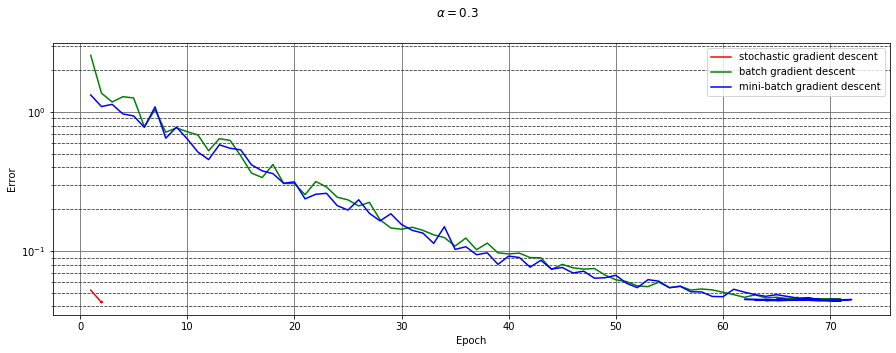

In [15]:
import matplotlib.pyplot as plt

# Plot the data
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.semilogy(sgd_epoch, sgd_error, c='r', label='stochastic gradient descent')
ax1.semilogy(gd_epoch,  gd_error,  c='g', label='batch gradient descent')
ax1.semilogy(mb_epoch,  mb_error,  c='b', label='mini-batch gradient descent')
plt.legend(loc='upper right');
plt.suptitle(r"$\alpha = 0.3$")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='#333333', linestyle='--')
plt.show()

## Part 3

The data set from a regression problem can be converted into a classification problem simply by using the sign of (+ or -) as representing one of two classes. In the data set used in Part 1 and 2, you'll see the variable z that represents this binary (0 or 1) class.

Use the perceptron learning rule to solve for the coefficients {$w_1$, $w_2$, $b$} of this classification problem.   

Two warnings: First, your solution to Part 3 should require only a few lines of code changed from the code you wrote for Part 2. Second, the Perceptron algorithm will not converge if there is no exact solution to the training data. It will jitter among coefficients that all yield roughly equally good solutions.

Complete the following functions below and use them to answer questions (A) and (B). 

**Note:** Please do not change the interface of the given functions.

In [0]:
def perceptron_update(X, y, w):
    """
    One epoch of Perceptron updates (full sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    incorrect : Incorrectly classified examples
    """
    pass

def perceptron(X, y, maxIter, alpha):
    """
    Implements the Perceptron algorithm.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    maxIter : The maximum number of iterations allowed 
    alpha : Learning Rate
    
    Returns
    -------
    w : Coefficients of the classifier
    incorrect : Incorrectly classified examples on termination
    """
    pass

(A) Report the values of coefficients $w_1$, $w_2$, and $b$.

(B) Make a graph of the accuracy (% correct classification) on the training set as a function of epoch.

## Part 4

In machine learning, we really want to train a model based on some data and then expect the model to do well on "out of sample" data. Try this with the code you wrote for Part 3:  Train the model on the first {5, 10, 25, 50, 75} examples in the data set and test the model on the final 25 examples.

Complete the following function below and use it to answer (A). 

**Note:** Please do not change the interface of the given function.

In [0]:
def classify(X, y, w):
    """
    Use this function to classify examples in the test set
    
    Parameters
    ----------
    X : Test set features
    y : Test set labels
    w : Perceptron coefficients
    
    Returns
    -------
    correct : number of correctly classified examples
    """
    pass

How does performance on the test set vary with the amount of training data? Make a bar graph showing performance for each of the different training set sizes.